# Contents

## 1. 데이터셋 확인

- 1.1 Null data check    
- 1.2 Target label 확인    

## 2. Exploratory data analysis
- 2.1 Pclass    
- 2.2 Sex    
- 2.3 Both Sex and Pclass   
- 2.4 Age      
- 2.5 Pclass, Sex, Age   
- 2.6 Embarked    
- 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)    
- 2.8 Cabin  


- 타이타닉은 알다시피, 사상 최대 해난사고로써, 1,500여명의 희생자가 생겼다. 
- 그래서 이 튜토리얼을 이용하여 타이타닉에 탑승한 사람들의 신상정보를 이용및 활용할 것이다.
    - 그정보를 토대로 승선한 사람들의 생존 여부를 예측하는 모델을 생성할 것이다. 

- 여기서는 여러가지 시각화 도구, 데이터 분석도구, 머신러닝도구를 사용할 것이다. 
    - 시각화도구 (matplotlib, seaborn, plotly)
    - 데이터 분석 도구(pandas, numpy)
    - 머신 러닝 도구(sklearn)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# 스타일 
plt.style.use('seaborn')
sns.set(font_scale=2.5)
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅
# 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편하다.

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

- 앞으로 진행할 프로세스 
    - 데이터 셋 확인 
        - 대부분의 캐글 데이터들이 잘 정제 되어 있다. 
        - 하지만 가끔 null data가 존재 
             - 이것을 확인하고 수정 
    - 탐색적 데이터 분석(exploratory data analysis)
        - 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인 
        - 여러가지 시각화 툴을 사용하여 인사이트를 얻는다.
    - feature engineering 
        - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering한다. 
        - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리등등....
    - model 만들기 
        - sklearn을 사용해 모델을 만든다.
        - 파이썬에서 머신러닝을 할 때에는 sklearn 을 사용
            - 수많은 알고리즘을 일관된 문법으로 사용가능하다. 
    - 모델 학습 및 예측 
        - train_set을 가지고 모델을 학습시킨 후, test_set을 가지고 예측(prediction)을 진행
    - 모델 평가 
        - 예측성능이 원하는 수준인지 판단
        - 풀려는 문제에 따라 모델을 평가하는 방식도 달라진다. 
            - 학습된 모델이 어떤것을 학습하였는지 확인이 필요 

# 1. Data_set 확인 

- 파이썬에서 테이블화 된 데이터를 다루는데 가장 최적화되어 있으며, 많이 쓰는 라이브러리는 pandas
- pandas를 사용하여 데이터 셋의 간단한 통계적 분석을 시작으로 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있다. 
- 파이썬으로 데이터 분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이기 때문에 여러 커널을 공부하면서 사용법에 능숙해지도록 반복하기를 권장한다. 

In [2]:
# 캐글에서 데이터 셋은 보통  train, testset로 나누어져 있다. 

df_train = pd.read_csv('../../input/train.csv')
df_test = pd.read_csv('../../input/test.csv')

In [3]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 우리가 다루는 문제에서 feature는  Pclass, Age, SibSp, Parch, Fare 
### -> 예측하려는 타겟 레이블은 Survived 

|변수(feature, variable)|정의|설명|타입|
|------|---|---|---|
|survival|생존여부 |target label 임. 1, 0 으로 표현됨|	integer|
|Pclass  |티켓의 클래스	1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 |1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature|	integer|
|sex     |성별     |male, female 로 구분되며 binary	|string|
|Age     |나이     |continuous|integer|
|sibSp   |함께 탑승한 형제와 배우자의 수|quantitative|integer|
|parch   |함께 탑승한 부모, 아이의 수	 |quantitative|integer|
|ticket  |티켓 번호|alphabat + integer  |string|
|fare    |탑승료	|continuous          |float|
|cabin   |객실 번호|alphabat + integer  |string|
|embared |탑승 항구|C = Cherbourg, Q = Queenstown, S = Southampton|string|

---
- pandas dataframe 에는 describe() 메소드가 있는 데, 이를 쓰면 각 feature 가 가진 통계치들을 반환

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 테이블에서 보다시피  PassenserID 숫자와 다른, 결측치가 존재하는 열을 추측할 수 있다.
- 이를 정확하게 확인하기 위해 시각화 해서 살펴 볼게요 

# 1.1 결측치 확인 

In [8]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100* (df_train[col].isnull().sum()/ df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [9]:
# 이해하기 쉽게 정리 
for col in df_train.columns:
    persent = 100* (df_train[col].isnull().sum()/ df_train[col].shape[0])
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, persent)
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [11]:
for col in df_test.columns:
    persent = 100* (df_test[col].isnull().sum()/ df_test[col].shape[0])
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, persent)
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- 학습, 테스트 셋에서 age(둘다20%), cabin(둘다 약 80%),Embarked(Train만 0.22%)
    - 결측치가 존재하는것을 알 수 있다. 
- 결측치를 시각화 하기 위해서 MANO라는 라이브러리를 사용하면 null값을 좀 더 쉽게 확인이 가능하다. 

In [15]:
# msno.matrix(df= df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

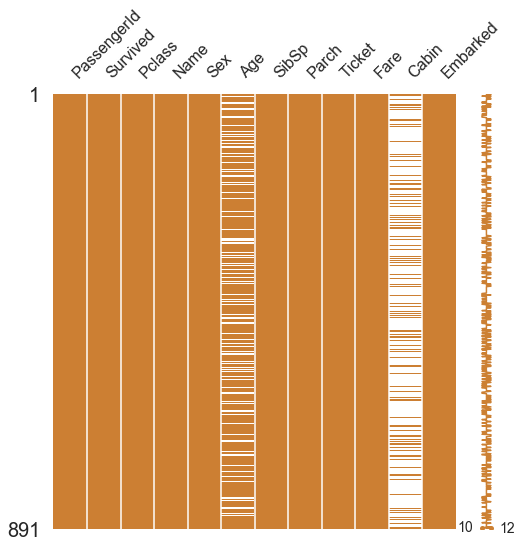

In [12]:
msno.matrix(df= df_train.iloc[:,:],  figsize=(8,8), color=(0.8, 0.5, 0.2))

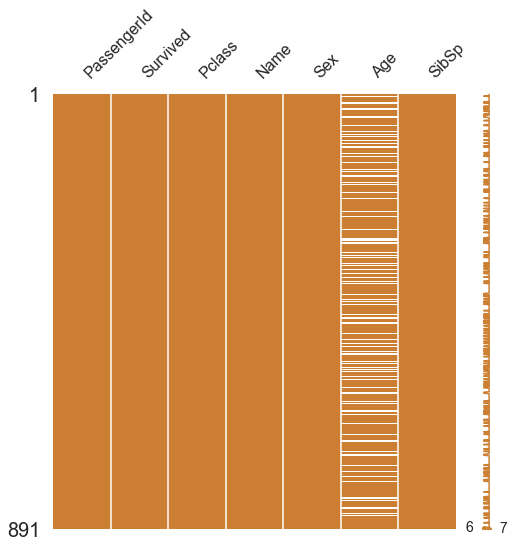

In [23]:
# 코드 확인용 
msno.matrix(df= df_train.iloc[:,:7],  figsize=(8,8), color=(0.8, 0.5, 0.2))

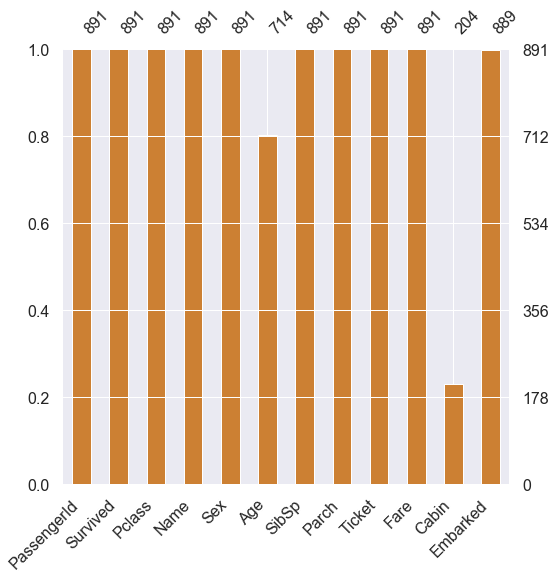

In [16]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

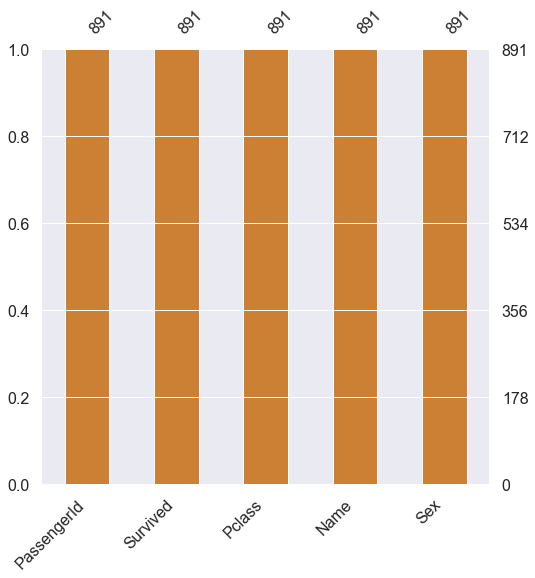

In [24]:
# 코드 확인용 
msno.bar(df=df_train.iloc[:,:5], figsize=(8,8), color=(0.8, 0.5, 0.2))

# 1.2 타겟 데이터 확인 

- 타겟 레이블이 어떤 분포(distribution)를 가지고 있는지 확인 
- 바이너리 분류( binary classification )
    - 1과 0의 분포가 어떻게 분포하느냐에 따라 모델의 평가 방법이 달라진다. 
    

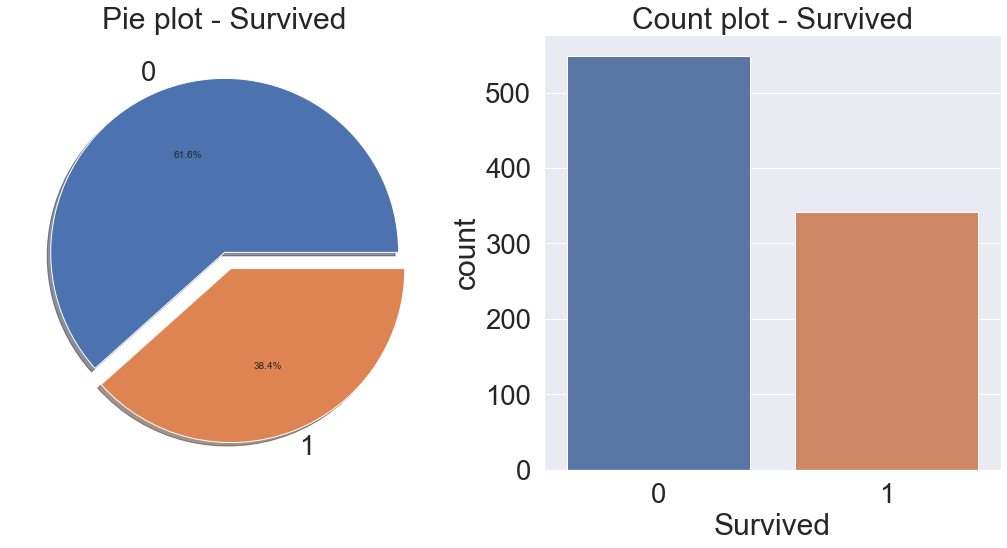

In [41]:
f,ax = plt.subplots(1,2, figsize=(18,8))

df_train.Survived.value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax= ax[0] , shadow= True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [36]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

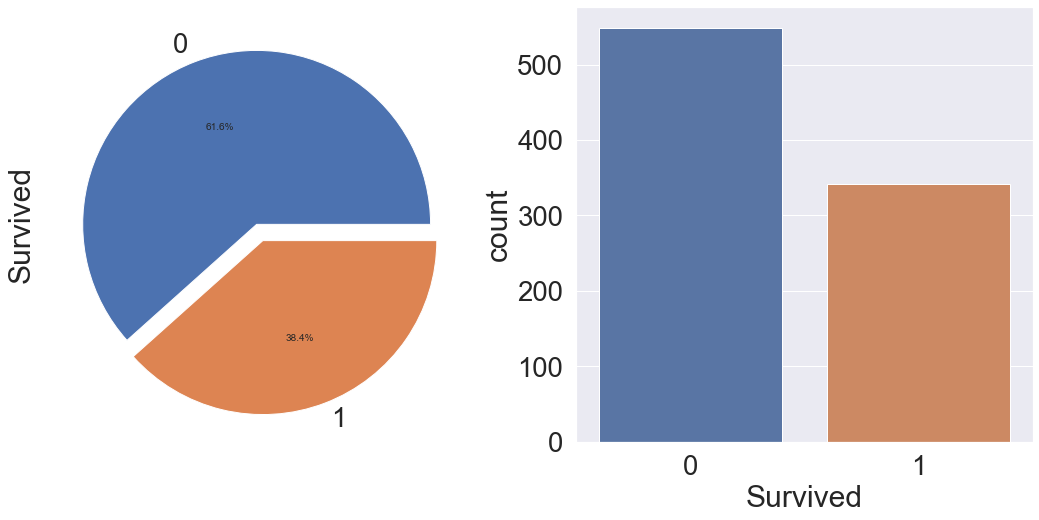

In [46]:
f,ax = plt.subplots(1,2, figsize=(18,8))

Survived_cunt = df_train.Survived.value_counts()
Survived_cunt.plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax= ax[0])

sns.countplot('Survived', data=df_train, ax=ax[1])

plt.show()

- 죽은 사람이 많다는것을 확인 가능 
- 38.4% 가 살아 남았다. 

- 타겟 레이블의 분포가 제법 균일한것도 확인 
- 불균일한 경우 예를들면 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라고 해도 
- 정확도가 99%가 나온다 
- 0을 찾는 문제라면 이모델은 원하는 결과를 줄 수 없다. -> 지금은 중요하지 않음  

# 2. EDA(Exploratory data analysis)
